
# Linear Regression

y = m * x + c


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
import time

In [55]:
dt = pd.read_csv('tumour.csv')
dt

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Y= theta0 + theta1 * X

In [7]:
dataset = dt.take([2,1],axis=1)
dataset

,radius_mean,diagnosis
0,17.99,M
1,20.57,M
2,19.69,M
3,11.42,M
4,20.29,M
...,...,...
564,21.56,M
565,20.13,M
566,16.60,M
567,20.60,M


In [8]:
dataset['diagnosis'] = dataset['diagnosis'].replace(to_replace=['M','B'],value=[1,0])
dataset

,radius_mean,diagnosis
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1
...,...,...
564,21.56,1
565,20.13,1
566,16.60,1
567,20.60,1


<AxesSubplot:xlabel='radius_mean', ylabel='diagnosis'>

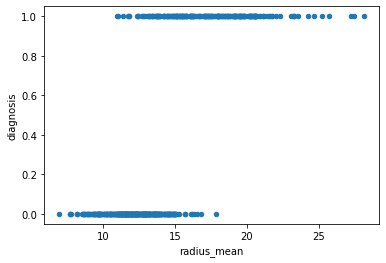

In [9]:
dataset.plot(x='radius_mean',y='diagnosis',kind='scatter')

In [46]:
theta0 = 10
theta1 = 10
alpha = 0.001
m = dataset.shape[0]
epoc = 100

In [30]:
dataset['radius_mean']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64

In [31]:
x = np.array(dataset['radius_mean'])
x = x.reshape((1,m))
x.shape

(1, 569)

In [32]:
y= np.array(dataset['diagnosis'])
y = y.reshape((1,m))
y.shape

(1, 569)

In [33]:
ones = np.ones(shape=(m,1))
ones.shape

(569, 1)

In [34]:
from IPython.display import clear_output

Epoc :  99
Cost Function : [[3.14378141]]


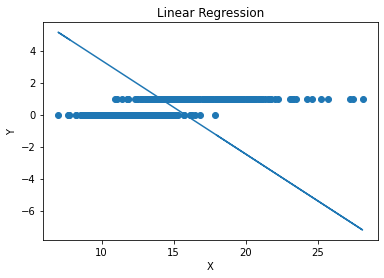

In [47]:
# import os
best_cf = 1e9
best_th0 = 0
best_th1  =0

for _ in range(epoc):
    clear_output(wait=True)
    print("Epoc : ",_)
    hypo = theta0 + (x*theta1)
    temp0 = theta0 - alpha*np.matmul((hypo-y),ones) / m
    temp1 = theta1 - alpha*np.matmul((hypo-y),np.transpose(x)) / m
#     print(f"New Theta0 : {temp0}\nNew Theta1 : {temp1}")
    
    cost_function = np.matmul((hypo-y)**2,ones) /(2*m)
    print(f"Cost Function : {cost_function}")
    
    
    if cost_function <best_cf:
        best_cf = cost_function
        best_th0 = temp0
        best_th1 = temp1
    
    
    theta0 = temp0
    theta1 = temp1
    
#     plt.subplot(121)
    plt.scatter(dataset['radius_mean'], dataset['diagnosis'])
    plt.plot(dataset['radius_mean'],hypo.ravel())
    plt.title("Linear Regression")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
#     plt.subplot(122)
#     plt.title("Cost Function Vs Iteration")
#     plt.xlabel("Iteration")
#     plt.ylabel("Cost Function")
#     plt.plot(_, cost_function, color='green', linestyle='solid', linewidth = 3, 
#          marker='o')
    
    
    time.sleep(1)


    
    
# clear_output(wait=True)


Best Cost Function :  [[3.14378141]]


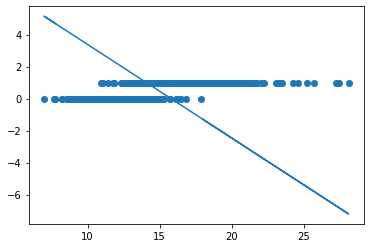

In [48]:
print("Best Cost Function : ",best_cf)    
hypo = best_th0 + (x*best_th1)
plt.scatter(dataset['radius_mean'], dataset['diagnosis'])
plt.plot(dataset['radius_mean'],hypo.ravel())

In [49]:
def predict(val):
    return 1 if best_th0 + (best_th1*val)>0.5 else 0

In [50]:
predict(10)

1

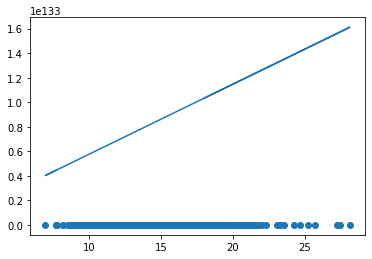

In [168]:
hypo = theta0 + (x*theta1)
# plt.scatter(dataset['radius_mean'], dataset['diagnosis'])# dataset.plot(x='radius_mean',y='diagnosis',kind='scatter')

plt.plot(dataset['radius_mean'],hypo.ravel())
plt.scatter(dataset['radius_mean'], dataset['diagnosis'])
plt.show()


# Multilinear Regression

# Y = theta0 + theta1 * X1 + theta2*X2 + . . . 

In [64]:
dt

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [103]:
x = dt.loc[:,['radius_mean','smoothness_mean']]
y= dt.loc[:,['diagnosis']]

In [85]:
x

,radius_mean,smoothness_mean
0,17.99,0.11840
1,20.57,0.08474
2,19.69,0.10960
3,11.42,0.14250
4,20.29,0.10030
...,...,...
564,21.56,0.11100
565,20.13,0.09780
566,16.60,0.08455
567,20.60,0.11780


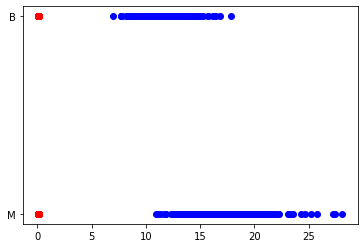

In [97]:
#Plot x1 vs y
# x.plot('smoothness_mean','radius_mean',kind='scatter')
plt.scatter(x.smoothness_mean,y,color='r')
plt.scatter(x.radius_mean,y,color='b')


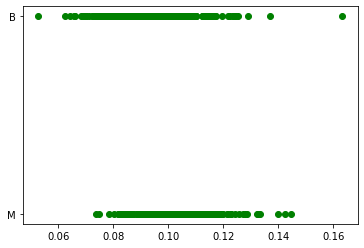

In [99]:
plt.scatter(x.smoothness_mean,y,color='g')


In [100]:
x

,radius_mean,smoothness_mean
0,17.99,0.11840
1,20.57,0.08474
2,19.69,0.10960
3,11.42,0.14250
4,20.29,0.10030
...,...,...
564,21.56,0.11100
565,20.13,0.09780
566,16.60,0.08455
567,20.60,0.11780


In [107]:
y = y.replace(to_replace=['M','B'],value=[1,0])
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


# Test


In [69]:
d = {
    'Num':[1,2,3,4]
}
df = pd.DataFrame(d)

In [70]:
x=5
y=10

In [71]:
dff =x+(df*y)

In [72]:
df

,Num
0,1
1,2
2,3
3,4


In [73]:
dff

,Num
0,15
1,25
2,35
3,45


In [74]:
d1 = np.array(df)

In [78]:
d1=np.transpose(d1)
d1,d1.shape


(array([[1, 2, 3, 4]], dtype=int64), (1, 4))

In [79]:
d2 = np.array(dff)

In [81]:
d2,d2.shape

(array([[15],
        [25],
        [35],
        [45]], dtype=int64),
 (4, 1))

In [67]:
df*dff

array([[ 15,  30,  45,  60],
       [ 25,  50,  75, 100],
       [ 35,  70, 105, 140],
       [ 45,  90, 135, 180]], dtype=int64)

In [82]:
np.matmul(d1,d2)

array([[350]], dtype=int64)

In [84]:
d3 = np.ones(shape=(4,1))

In [85]:
np.matmul(d1,d3)

array([[10.]])

In [112]:
d1

array([[1, 2, 3, 4]], dtype=int64)

In [113]:
d1**2

array([[ 1,  4,  9, 16]], dtype=int64)

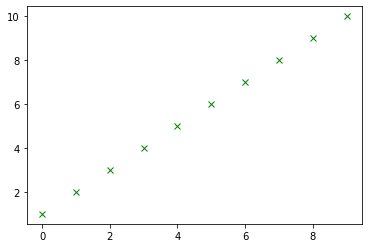

In [5]:
for i in range(0,10):
    plt.plot(i, i + 1, color='green', linestyle='solid', linewidth = 3, 
         marker='x')
#     time.sleep(2)
plt.show()